In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Import data

In [3]:
SAVE_RESULTS = False
df = pd.read_csv('data/wind_dataset.csv')
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


### Exercise 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CDFB4120F0>,
      dtype=object)

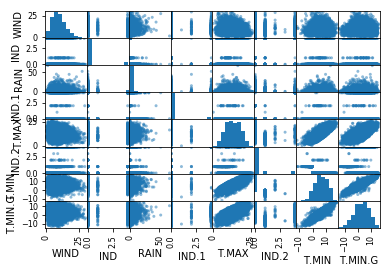

In [4]:
scatter_matrix(df, diagonal='hist')

### Exercise 4 (ML)

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [20]:
_df = df[['WIND', 'RAIN']]

y = df.WIND
x = df[['RAIN']]

In [23]:
# Fitting

modelLinearRegression = LinearRegression().fit(x, y)

In [29]:
modelLinearRegression.coef_

array([0.14926901])

In [28]:
modelLinearRegression.intercept_

9.515437221340857

In [34]:
modelLinearRegression.predict(df[['RAIN']])

array([ 9.54529102, 10.27670915,  9.57514482, ..., 11.7096916 ,
       10.24685535,  9.59007172])

In [36]:
r2_score(
    y_true= df.WIND,
    y_pred= modelLinearRegression.predict(df[['RAIN']])
)

0.01461101864890535

### Visualization

In [37]:
from plotnine import ggplot, aes, geom_point, geom_line
from plotnine import theme_minimal

In [38]:
df['fitted'] = modelLinearRegression.predict(df[['RAIN']])
df

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,fitted
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0,9.545291
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1,10.276709
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5,9.575145
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2,9.545291
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5,11.067835
...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0,12.023157
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0,11.903741
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2,11.709692
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5,10.246855


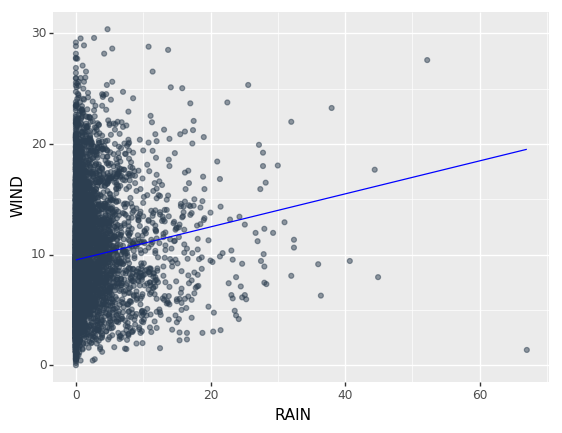

<ggplot: (-9223371844217469352)>

In [45]:
ggplot(aes('RAIN', 'WIND'), df) \
    + geom_point(alpha = 0.5, color = "#2c3e50") \
    + geom_line(aes(y = 'fitted'), color = "#0000FF")

### References

1. [https://www.youtube.com/watch?v=A2zlm3NkeDk](https://www.youtube.com/watch?v=A2zlm3NkeDk)
2. [regression-metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
